In [1]:
import numpy as np
import pyDR as DR
from pyDR.Project import Project
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [2]:
ile_resn = [3, 13, 23, 30, 36, 44, 61]

In [3]:
frames=list()
frames.append({'Type':'methylCC','Nuc':'ivl', 'resids':ile_resn,'sigma':0})
frames.append({'Type':'side_chain_chi','Nuc':'ivl', 'resids':ile_resn,'n_bonds':1,'sigma':0})
frames.append({'Type':'side_chain_chi','Nuc':'ivl', 'resids':ile_resn,'n_bonds':2,'sigma':0})

"Frames with post-process smoothing"
frames.append({'Type':'hops_3site','Nuc':'ivl', 'resids':ile_resn,'sigma':5})
frames.append({'Type':'methylCC','Nuc':'ivl', 'resids':ile_resn,'sigma':5})
frames.append({'Type':'chi_hop','Nuc':'ivl', 'resids':ile_resn,'n_bonds':1,'sigma':50})
frames.append({'Type':'side_chain_chi','Nuc':'ivl', 'resids':ile_resn,'n_bonds':1,'sigma':50})
frames.append({'Type':'chi_hop','Nuc':'ivl', 'resids':ile_resn,'n_bonds':2,'sigma':50})
frames.append({'Type':'side_chain_chi','Nuc':'ivl', 'resids':ile_resn,'n_bonds':2,'sigma':50})

In [4]:
include=np.zeros([3,9],dtype=bool)
include[0][:3]=True  
include[1][[4,6,8]]=True
include[2][3:]=True

In [5]:
tf=400000
t=np.arange(tf>>1)*.005

In [6]:
out_list=list()
for i in range(4):
    j = i + 1
    molsys=DR.MolSys('/mnt/c/Users/thier/Desktop/1ubq_frame.pdb',
                 '/home/mlehner/1ubq/test_00'+str(j)+'/run_001/traj_4us_PBC_fit.xtc',
                 tf=tf)
    select=DR.MolSelect(molsys)
    select.select_bond(Nuc='ivl', resids=ile_resn)
    fr_obj=DR.Frames.FrameObj(select)
    fr_obj.tensor_frame(sel1=1,sel2=2)
    for f in frames:fr_obj.new_frame(**f)
    fr_obj.load_frames(n=-1)
    fr_obj.post_process()
    data=fr_obj.frames2data(mode='full')
    proj=Project('/home/mlehner/pyDR/pyDR/test_project.nosync',create=True)
    for d in data:proj.append_data(d)
    proj[0].detect.r_no_opt(10)
    proj.fit(bounds=False)
    proj['no_opt'][0].detect.r_auto(5)
    proj['no_opt'].fit()
    out = fr_obj.frames2ct(include=include[-1], mode='full')
    out_list.append(out)

Loading Ref. Frames: |██████████████████████████████████████████████████| 100.0% Complete
Completed
Applying default post processing (only active for frames that define their own post processing)


Error: Canceled future for execute_request message before replies were done

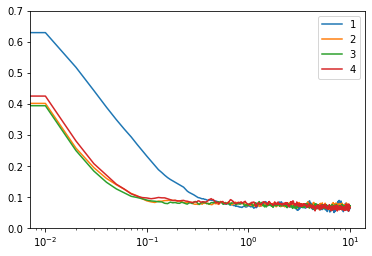

In [ ]:
fig = plt.figure()
ax = fig.gca()
ax.set_ylim([0,.7])
for out in out_list:
    #plt.semilogx(out['t'][:tf>>1],out['ct'].mean(0)[:tf>>1])
    plt.semilogx(out['t'][:tf>>1],out['ct_prod'].mean(0)[:tf>>1])
    plt.legend(['1','2','3','4','5','6','7','8'])


In [ ]:
out_list[1]['ct_prod'].shape

(42, 2000)

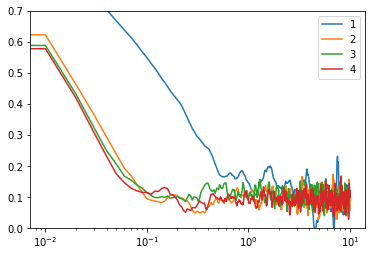

In [ ]:
fig = plt.figure()
ax = fig.gca()
ax.set_ylim([0,.7])
for out in out_list:
    #plt.semilogx(out['t'][:tf>>1],out['ct'].mean(0)[:tf>>1])
    plt.semilogx(out['t'][:tf>>1],out['ct_prod'][0][:tf>>1])
    plt.legend(['1','2','3','4','5','6','7','8'])

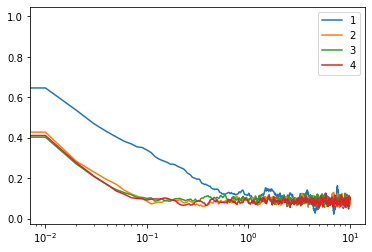

In [ ]:
for out in out_list:
    plt.semilogx(out['t'][:tf>>1],out['ct_prod'][:6].mean(0)[:tf>>1])
    plt.legend(['1','2','3','4','5','6','7','8'])

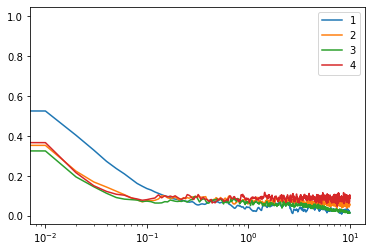

In [ ]:
for out in out_list:
    plt.semilogx(out['t'][:tf>>1],out['ct_prod'][6:12].mean(0)[:tf>>1])
    plt.legend(['1','2','3','4','5','6','7','8'])

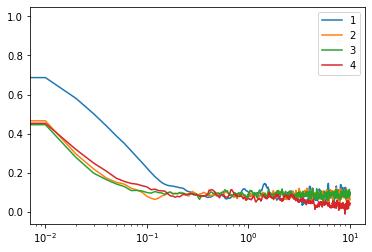

In [ ]:
for out in out_list:
    plt.semilogx(out['t'][:tf>>1],out['ct_prod'][12:18].mean(0)[:tf>>1])
    plt.legend(['1','2','3','4','5','6','7','8'])

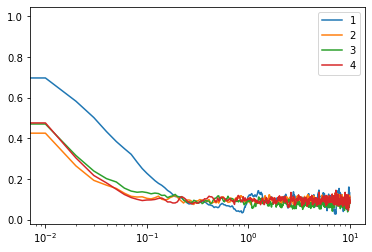

In [ ]:
for out in out_list:
    plt.semilogx(out['t'][:tf>>1],out['ct_prod'][18:24].mean(0)[:tf>>1])
    plt.legend(['1','2','3','4','5','6','7','8'])

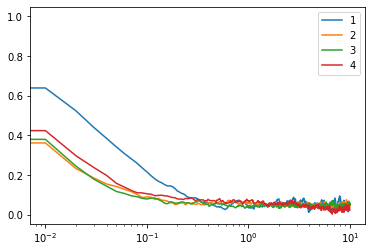

In [ ]:
for out in out_list:
    plt.semilogx(out['t'][:tf>>1],out['ct_prod'][24:30].mean(0)[:tf>>1])
    plt.legend(['1','2','3','4','5','6','7','8'])

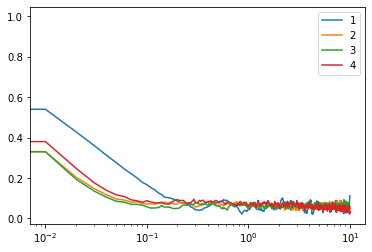

In [ ]:
for out in out_list:
    plt.semilogx(out['t'][:tf>>1],out['ct_prod'][30:36].mean(0)[:tf>>1])
    plt.legend(['1','2','3','4','5','6','7','8'])

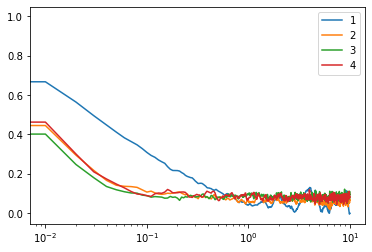

In [ ]:
for out in out_list:
    plt.semilogx(out['t'][:tf>>1],out['ct_prod'][36:42].mean(0)[:tf>>1])
    plt.legend(['1','2','3','4','5','6','7','8'])

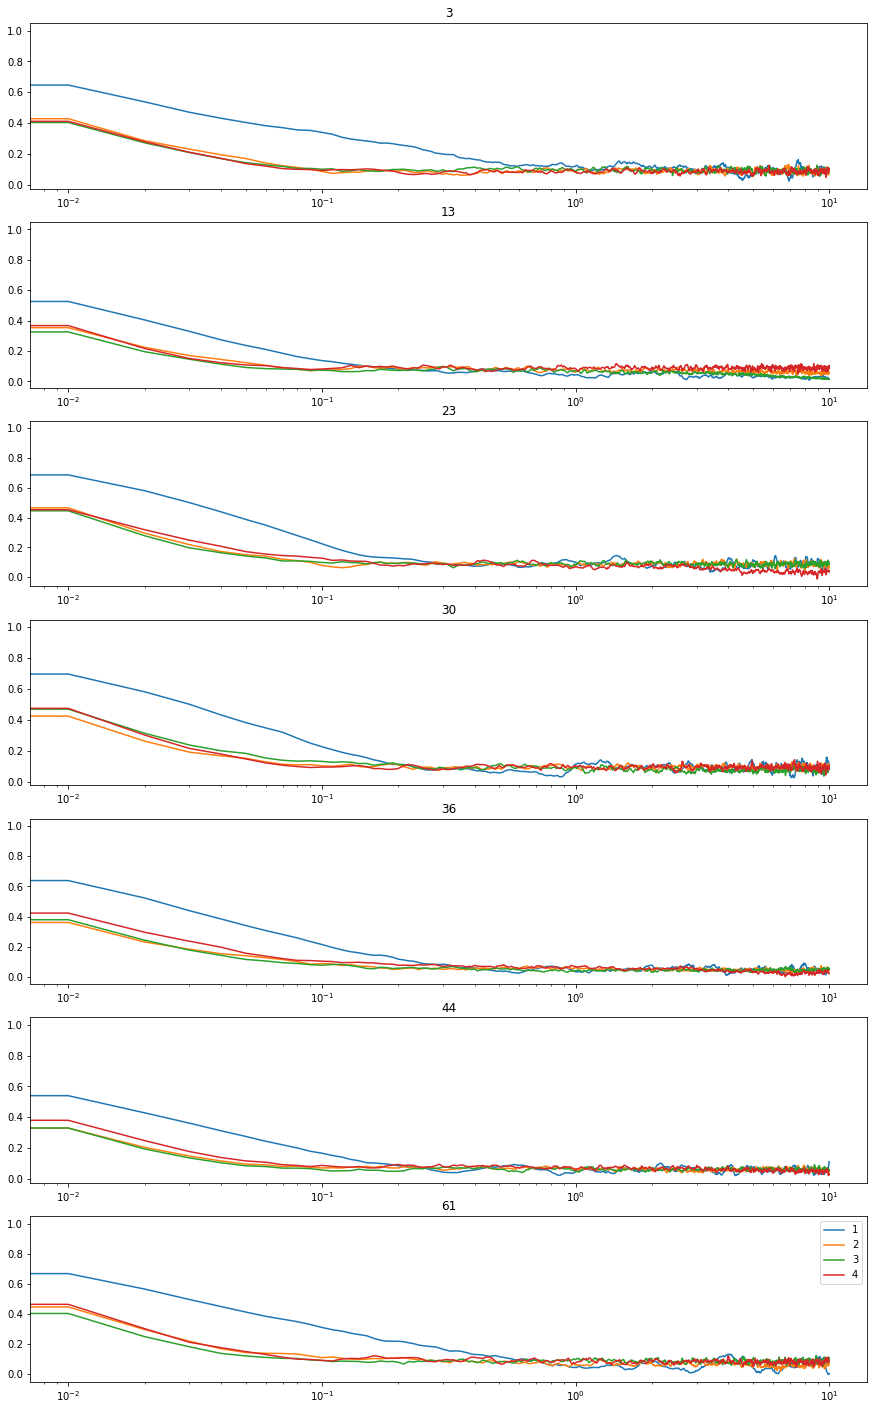

In [ ]:
fig, axs = plt.subplots(7, 1, figsize=(15,25))
for i, j in enumerate(ile_resn):
    for out in out_list:
        axs[i].semilogx(out['t'][:tf>>1],out['ct_prod'][i*6:(i+1)*6].mean(0)[:tf>>1])
        axs[i].title.set_text(str(j))
plt.legend(['1','2','3','4','5','6','7','8'])